In [3]:
%load_ext autotime

import scarf
scarf.__version__

'0.12.0'

time: 1.77 s (started: 2021-08-12 14:48:10 +02:00)


In [3]:
reader = scarf.CrH5Reader(
    "scarf_datasets/pbmc_granulocyte_sorted_3k_filtered_feature_bc_matrix.h5"
) 
reader.rename_assays({"assay2": "ATAC"})

time: 125 ms (started: 2021-08-12 08:38:34 +02:00)


In [6]:
writer = scarf.CrToZarr(
    reader,
    "scarf_datasets/tenx_3K_pbmc_multiome-gex-atac.zarr",
)

time: 609 ms (started: 2021-08-12 08:40:31 +02:00)


In [7]:
writer.dump()

  0%|                                                                                                         …

time: 7.03 s (started: 2021-08-12 08:40:38 +02:00)


In [4]:
ds =  scarf.DataStore('scarf_datasets/tenx_3K_pbmc_multiome.zarr', default_assay='RNA')
ds

DataStore has 2491 (2711) cells with 2 assays: ATAC RNA
   Cell metadata:
            'I', 'ids', 'names', 'ATAC_UMAP1', 'ATAC_UMAP2', 
            'ATAC_leiden_cluster', 'ATAC_nCounts', 'ATAC_nFeatures', 'RNA+ATAC_UMAP1', 'RNA+ATAC_UMAP2', 
            'RNA+ATAC_leiden_cluster', 'RNA_UMAP1', 'RNA_UMAP2', 'RNA_leiden_cluster', 'RNA_nCounts', 
            'RNA_nFeatures', 'RNA_percentMito', 'RNA_percentRibo'
   ATAC assay has 91543 (98319) features and following metadata:
            'I', 'ids', 'names', 'I__prevalent_peaks', 'dropOuts', 
            'nCells'
   RNA assay has 12912 (36601) features and following metadata:
            'I', 'ids', 'names', 'I__hvgs', 'dropOuts', 
            'nCells'

time: 94 ms (started: 2021-08-12 14:48:12 +02:00)


INFO: 113 cells flagged for filtering out using attribute RNA_nCounts
INFO: 105 cells flagged for filtering out using attribute RNA_nFeatures
INFO: 40 cells flagged for filtering out using attribute RNA_percentMito
INFO: 62 cells flagged for filtering out using attribute RNA_percentRibo


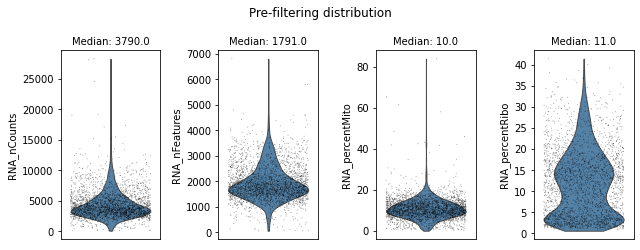

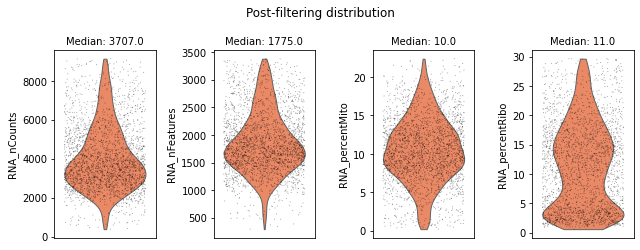

time: 1.8 s (started: 2021-08-12 08:41:42 +02:00)


In [11]:
ds.auto_filter_cells()

INFO: Setting `min_cells` to 27. Only those genes that are present in atleast this number of cells will be considered HVGs.


(RNA) Computing nCells:   0%|                                                                                 …

(RNA) Computing normed_tot:   0%|                                                                             …

(RNA) Computing sigmas:   0%|                                                                                 …

INFO: 1000 genes marked as HVGs


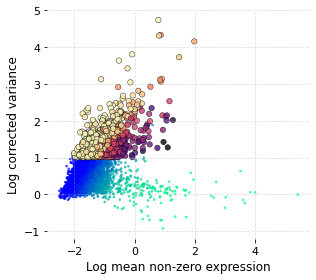

time: 3.55 s (started: 2021-08-12 08:42:16 +02:00)


In [12]:
ds.mark_hvgs(top_n=1000)

In [14]:
ds.make_graph(feat_key='hvgs')

Normalizing with feature subset:   0%|                                                                        …

Writing data to normed__I__hvgs/data:   0%|                                                                   …

Calculating mean of norm. data:   0%|                                                                         …

Calculating std. dev. of norm. data:   0%|                                                                    …

Fitting PCA:   0%|                                                                                            …

Fitting ANN:   0%|                                                                                            …

Fitting kmeans:   0%|                                                                                         …

Estimating seed partitions:   0%|                                                                             …

Saving KNN graph:   0%|                                                                                       …

Smoothening KNN distances:   0%|                                                                              …

INFO: ANN recall: 100.00%
time: 21.6 s (started: 2021-08-12 08:43:00 +02:00)


In [15]:
ds.run_umap()

	completed  0  /  300 epochs
	completed  30  /  300 epochs
	completed  60  /  300 epochs
	completed  90  /  300 epochs
	completed  120  /  300 epochs
	completed  150  /  300 epochs
	completed  180  /  300 epochs
	completed  210  /  300 epochs
	completed  240  /  300 epochs
	completed  270  /  300 epochs
time: 3.05 s (started: 2021-08-12 08:43:59 +02:00)


In [16]:
ds.run_leiden_clustering()

time: 140 ms (started: 2021-08-12 08:44:04 +02:00)


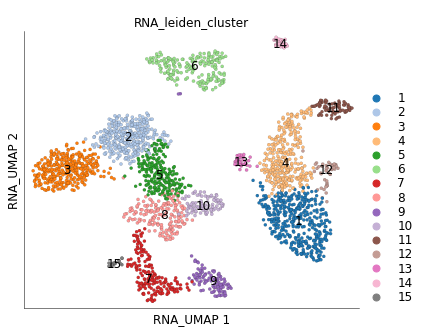

time: 375 ms (started: 2021-08-12 08:44:33 +02:00)


In [18]:
ds.plot_layout(layout_key='RNA_UMAP', color_by='RNA_leiden_cluster')

In [19]:
ds.mark_prevalent_peaks(from_assay='ATAC', top_n=20000)

(ATAC) Calculating peak prevalence across cells:   0%|                                                        …

time: 2.75 s (started: 2021-08-12 08:44:58 +02:00)


In [29]:
ds.make_graph(feat_key='prevalent_peaks', from_assay='ATAC', dims=200)

INFO: Using existing normalized data with cell key I and feat key I__prevalent_peaks


Fitting LSI model:   0%|                                                                                      …

Fitting ANN:   0%|                                                                                            …

Fitting kmeans:   0%|                                                                                         …

Estimating seed partitions:   0%|                                                                             …

Saving KNN graph:   0%|                                                                                       …

Smoothening KNN distances:   0%|                                                                              …

INFO: ANN recall: 98.11%
time: 48 s (started: 2021-08-12 08:49:11 +02:00)


In [30]:
ds.run_umap(from_assay='ATAC')

	completed  0  /  300 epochs
	completed  30  /  300 epochs
	completed  60  /  300 epochs
	completed  90  /  300 epochs
	completed  120  /  300 epochs
	completed  150  /  300 epochs
	completed  180  /  300 epochs
	completed  210  /  300 epochs
	completed  240  /  300 epochs
	completed  270  /  300 epochs
time: 3.33 s (started: 2021-08-12 08:49:59 +02:00)


In [31]:
ds.run_leiden_clustering(from_assay='ATAC')

time: 62 ms (started: 2021-08-12 08:50:03 +02:00)


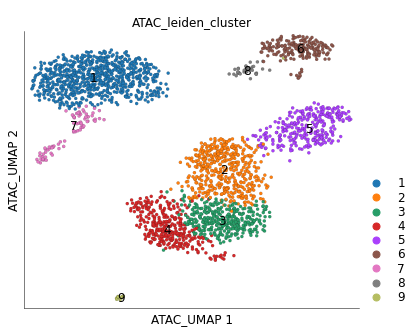

time: 265 ms (started: 2021-08-12 08:50:03 +02:00)


In [32]:
ds.plot_layout(layout_key='ATAC_UMAP', color_by='ATAC_leiden_cluster')

In [33]:
ds.integrate_assays(assays=['RNA', 'ATAC'], label='RNA+ATAC')

Identifying SNNs in graphs:   0%|                                                                             …

Merging graph edges:   0%|                                                                                    …

time: 2.39 s (started: 2021-08-12 08:51:54 +02:00)


In [36]:
ds.run_umap(
    integrated_graph='RNA+ATAC',
)
ds.run_leiden_clustering(integrated_graph='RNA+ATAC', resolution=1.75)

	completed  0  /  300 epochs
	completed  30  /  300 epochs
	completed  60  /  300 epochs
	completed  90  /  300 epochs
	completed  120  /  300 epochs
	completed  150  /  300 epochs
	completed  180  /  300 epochs
	completed  210  /  300 epochs
	completed  240  /  300 epochs
	completed  270  /  300 epochs
time: 3.91 s (started: 2021-08-12 09:08:59 +02:00)


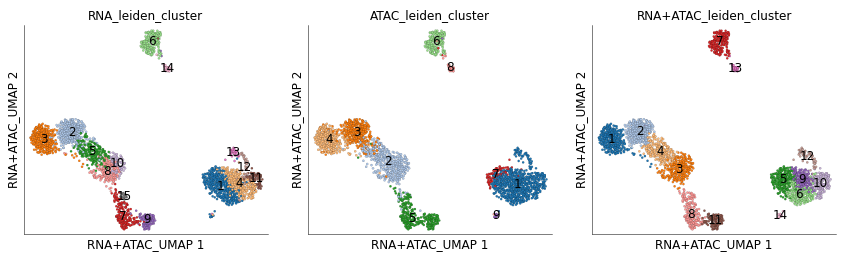

time: 406 ms (started: 2021-08-12 09:09:03 +02:00)


In [37]:
ds.plot_layout(
    layout_key=['RNA+ATAC_UMAP'],
    color_by=['RNA_leiden_cluster', 'ATAC_leiden_cluster',
              'RNA+ATAC_leiden_cluster'],
    cmap='tab20', legend_onside=False, point_size=5,
    width=4, height=4, n_columns=3
)

In [40]:
ds.ATAC.feats.head()

,I,ids,names,I__prevalent_peaks,dropOuts,nCells,stats_I_prevalence
0,True,chr1:9768-10660,chr1:9768-10660,False,2685,26,0.039960
1,True,chr1:180582-181297,chr1:180582-181297,False,2681,30,0.042778
2,False,chr1:181404-181887,chr1:181404-181887,False,2698,13,NaN
3,False,chr1:191175-192089,chr1:191175-192089,False,2692,19,NaN
4,True,chr1:267561-268455,chr1:267561-268455,False,2652,59,0.076567


time: 31 ms (started: 2021-08-12 09:20:24 +02:00)
